In [8]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
img=cv2.imread("./data set/adam_gilchrist/05528cac1e.jpg")
assert not isinstance(img,type(None)),'image not found'

In [10]:
img.shape

(192, 192, 3)

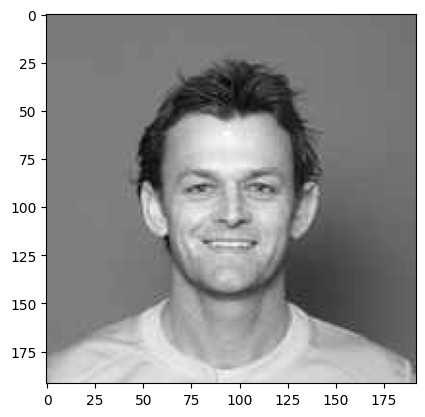

In [11]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [12]:
face=cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_frontalface_default.xml')
eyes=cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_eye.xml')

In [13]:
face1=face.detectMultiScale(gray,1.3,5)
face1

array([[56, 59, 81, 81]])

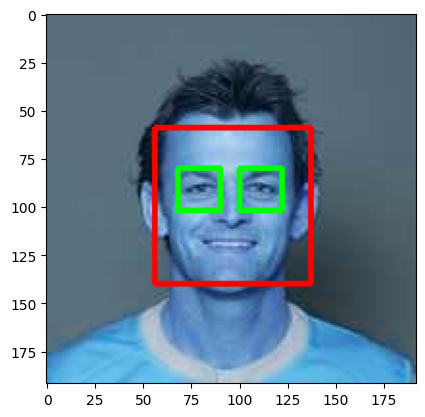

In [14]:
for (x,y,w,h) in face1:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+h]
    eyes=eyes.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

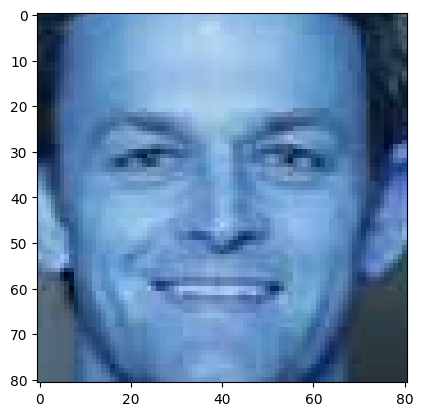

In [15]:
face=cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_frontalface_default.xml')
eyes=cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_eye.xml')
def get_cropped_image(image_path):
    img=cv2.imread(image_path)
    assert not isinstance(img,type(None)),'image not found'
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face1=face.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in face1:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+h]
        eye=eyes.detectMultiScale(roi_gray)
        if len(eye)>=2:
            return roi_color
croped_image=get_cropped_image("./data set/adam_gilchrist/05528cac1e.jpg")
plt.imshow(croped_image)
        



    
    

In [20]:
path_to_data="./data set/"
path_to_crpdata="./data set/croped/"
import os
img_drs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_drs.append(entry.path)

In [65]:
import shutil
if os.path.exists(path_to_crpdata):
    shutil.rmtree(path_to_crpdata)
os.mkdir(path_to_crpdata)


In [31]:
img_names=[]
celebrity_filenames={}
for img_dr in img_drs:
    count=1
    celebrity_name=img_dr.split('/')[-1]
    celebrity_filenames[celebrity_name]=[]
    for entry in os.scandir(img_dr):
        if entry.path[-1]=='g':
            try:
                roi=get_cropped_image(entry.path)
            except:
                continue
            if roi is not None:
                croped_folder=path_to_crpdata + celebrity_name
                if not os.path.exists(croped_folder):
                    os.makedirs(croped_folder)
                    img_names.append(croped_folder)
                    print("generating cropped images in folder:",croped_folder)
                croped_file_name=celebrity_name+str(count)+".png"
                croped_file_path=croped_folder+"/"+croped_file_name
                cv2.imwrite(croped_file_path,roi)
                celebrity_filenames[celebrity_name].append(croped_file_path)
                count+=1

In [32]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

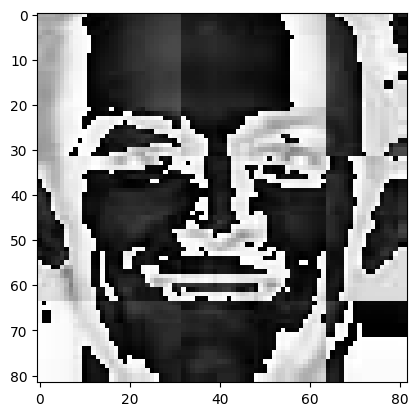

In [33]:
croped_image=get_cropped_image("./data set/adam_gilchrist/05528cac1e.jpg")

wavelet_image=w2d(croped_image,'db1',5)
plt.imshow(wavelet_image,cmap='gray')

In [34]:
celebrity_filenames

{'adam_gilchrist': ['./data set/croped/adam_gilchrist/adam_gilchrist1.png',
  './data set/croped/adam_gilchrist/adam_gilchrist2.png',
  './data set/croped/adam_gilchrist/adam_gilchrist3.png',
  './data set/croped/adam_gilchrist/adam_gilchrist4.png',
  './data set/croped/adam_gilchrist/adam_gilchrist5.png',
  './data set/croped/adam_gilchrist/adam_gilchrist6.png',
  './data set/croped/adam_gilchrist/adam_gilchrist7.png',
  './data set/croped/adam_gilchrist/adam_gilchrist8.png',
  './data set/croped/adam_gilchrist/adam_gilchrist9.png',
  './data set/croped/adam_gilchrist/adam_gilchrist10.png',
  './data set/croped/adam_gilchrist/adam_gilchrist11.png',
  './data set/croped/adam_gilchrist/adam_gilchrist12.png',
  './data set/croped/adam_gilchrist/adam_gilchrist13.png',
  './data set/croped/adam_gilchrist/adam_gilchrist14.png',
  './data set/croped/adam_gilchrist/adam_gilchrist15.png',
  './data set/croped/adam_gilchrist/adam_gilchrist16.png',
  './data set/croped/adam_gilchrist/adam_gilchr

In [36]:
del celebrity_filenames['croped']
class_dict = {}
count = 0
for celebrity_name in celebrity_filenames.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'adam_gilchrist': 0,
 'alastair_cook': 1,
 'allan_donald': 2,
 'brian_lara': 3,
 'chris_gayle': 4,
 'curtly_ambrose': 5,
 'dale_steyn': 6,
 'don_bradman': 7,
 'garfield_sobers': 8,
 'glenn_mcgrath': 9,
 'ian_botham': 10,
 'imran_khan': 11,
 'james_anderson': 12,
 'jaques_kallis': 13,
 'kapil_dev': 14,
 'kumar_sangakkara': 15,
 'mahela_jayawardene': 16,
 'ms_dhoni': 17,
 'muttiah_muralitharan': 18,
 'rahul_dravid': 19,
 'richard_hadlee': 20,
 'ricky_ponting': 21,
 'sachin_tendulkar': 22,
 'shane_warne': 23,
 'shoaib_akhtar': 24,
 'steve_waugh': 25,
 'sunil_gavaskar': 26,
 'virat_kohli': 27,
 'viv_richards': 28,
 'wasim_akram': 29}

In [38]:
X, y = [], []
for celebrity_name, training_files in celebrity_filenames.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [42]:
len(X[0])

4096

In [44]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 1

In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel = 'linear', C = 0.001))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.523972602739726

In [65]:
!pip install joblib
import joblib 
joblib.dump(pipe, 'saved_model.pkl') 

['saved_model.pkl']

In [66]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))